In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("D:\Leena data from picture folder\python\healthcare_patient_journey.csv")

In [7]:
df.head()

,patient_id,age,gender,chronic_condition,admission_type,department,wait_time_min,length_of_stay_days,procedures_count,medication_count,complications,discharge_status,readmitted_30d,total_cost_€,satisfaction_score
0,1,69,male,0,scheduled,Neurology,41,2,0,3,1,referred,1,1440,2
1,2,38,male,0,emergency,Oncology,17,3,1,2,0,recovered,0,2060,3
2,3,81,male,0,scheduled,Neurology,40,2,3,2,0,recovered,0,2110,3
3,4,67,female,1,emergency,ER,7,4,5,9,0,recovered,0,4070,3
4,5,88,male,1,emergency,Cardiology,34,3,7,5,0,recovered,1,3800,3


In [11]:
df.columns

Index(['patient_id', 'age', 'gender', 'chronic_condition', 'admission_type',
       'department', 'wait_time_min', 'length_of_stay_days',
       'procedures_count', 'medication_count', 'complications',
       'discharge_status', 'readmitted_30d', 'total_cost_€',
       'satisfaction_score'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           3000 non-null   int64 
 1   age                  3000 non-null   int64 
 2   gender               3000 non-null   object
 3   chronic_condition    3000 non-null   int64 
 4   admission_type       3000 non-null   object
 5   department           3000 non-null   object
 6   wait_time_min        3000 non-null   int64 
 7   length_of_stay_days  3000 non-null   int64 
 8   procedures_count     3000 non-null   int64 
 9   medication_count     3000 non-null   int64 
 10  complications        3000 non-null   int64 
 11  discharge_status     3000 non-null   object
 12  readmitted_30d       3000 non-null   int64 
 13  total_cost_€         3000 non-null   int64 
 14  satisfaction_score   3000 non-null   int64 
dtypes: int64(11), object(4)
memory usage: 351.7+ KB


In [13]:
df.isnull().sum()

patient_id             0
age                    0
gender                 0
chronic_condition      0
admission_type         0
department             0
wait_time_min          0
length_of_stay_days    0
procedures_count       0
medication_count       0
complications          0
discharge_status       0
readmitted_30d         0
total_cost_€           0
satisfaction_score     0
dtype: int64

In [12]:
df.describe()

,patient_id,age,chronic_condition,wait_time_min,length_of_stay_days,procedures_count,medication_count,complications,readmitted_30d,total_cost_€,satisfaction_score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,53.051333,0.405667,33.326333,3.535000,2.435667,3.404667,0.160333,0.234667,2772.040000,2.803000
std,866.169729,20.704901,0.491102,17.111559,2.024881,1.595842,1.890883,0.366976,0.423861,1086.215721,0.838506
min,1.000000,18.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,750.000000,1.000000
25%,750.750000,35.000000,0.000000,20.750000,2.000000,1.000000,2.000000,0.000000,0.000000,1900.000000,2.000000
50%,1500.500000,53.000000,0.000000,33.000000,3.000000,2.000000,3.000000,0.000000,0.000000,2670.000000,3.000000
75%,2250.250000,71.000000,1.000000,45.000000,5.000000,3.000000,5.000000,0.000000,0.000000,3490.000000,3.000000
max,3000.000000,89.000000,1.000000,103.000000,11.000000,10.000000,11.000000,1.000000,1.000000,6610.000000,5.000000


In [44]:
df.rename(columns={'total_cost_€': 'total_cost'},inplace=True)

In [35]:
df.columns=df.columns.str.lower().str.strip()

In [36]:
#Basic Analysis Gender distribution
df["gender"].value_counts()

gender
male      1533
female    1467
Name: count, dtype: int64

Basic Analysis Admission type distribution

In [37]:
df["admission_type"].value_counts()

admission_type
emergency    1752
scheduled    1248
Name: count, dtype: int64

Department wise average wait time

In [38]:
df.groupby('department')["wait_time_min"].mean().sort_values(ascending=False)

department
Polyclinic    33.766721
ER            33.666113
Oncology      33.367893
Neurology     32.994992
Cardiology    32.814626
Name: wait_time_min, dtype: float64

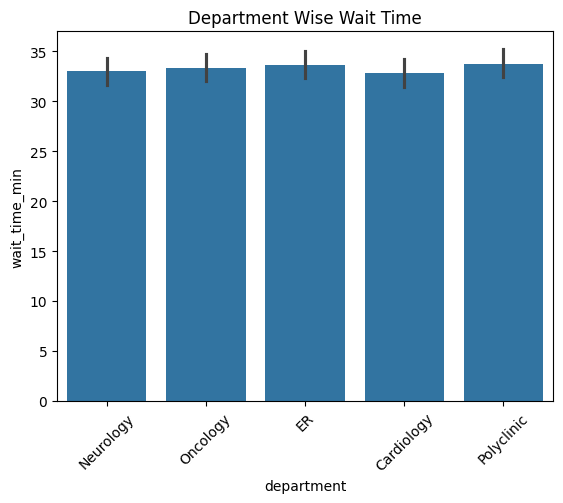

In [39]:
plt.figure()
sns.barplot(x='department',y='wait_time_min',data=df)
plt.xticks(rotation=45)
plt.title("Department Wise Wait Time")
plt.show()

In [40]:
df.groupby('chronic_condition')['length_of_stay_days'].mean()

chronic_condition
0    2.74369
1    4.69433
Name: length_of_stay_days, dtype: float64

In [45]:
df.groupby('chronic_condition')['total_cost'].mean()

chronic_condition
0    2280.117779
1    3492.744454
Name: total_cost, dtype: float64

Re-admission Analysis

In [46]:
df['readmitted_30d'].value_counts(normalize=True) * 100

readmitted_30d
0    76.533333
1    23.466667
Name: proportion, dtype: float64

In [47]:
df.groupby('department')['readmitted_30d'].mean().sort_values(ascending=False)

department
Neurology     0.248748
Cardiology    0.248299
Oncology      0.229097
ER            0.227575
Polyclinic    0.220228
Name: readmitted_30d, dtype: float64

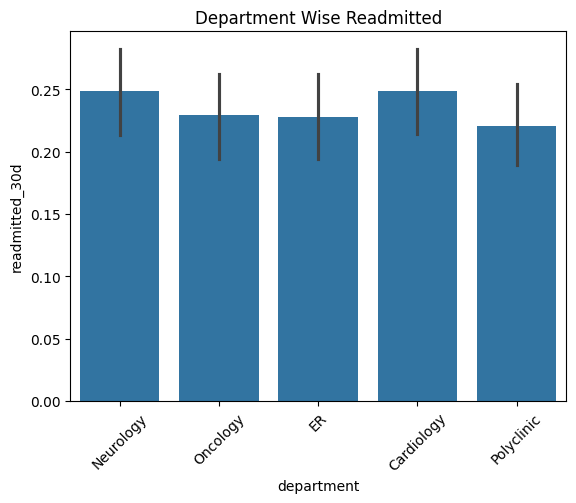

In [48]:
plt.figure()
sns.barplot(x='department',y='readmitted_30d',data=df)
plt.xticks(rotation=45)
plt.title("Department Wise Readmitted")
plt.show()

In [49]:
df.groupby('admission_type')['length_of_stay_days'].mean()

admission_type
emergency    3.539384
scheduled    3.528846
Name: length_of_stay_days, dtype: float64

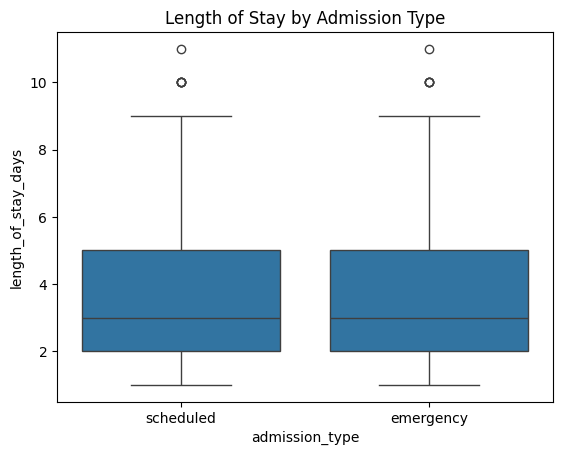

In [50]:
plt.figure()
sns.boxplot(x='admission_type', y='length_of_stay_days', data=df)
plt.title("Length of Stay by Admission Type")
plt.show()

In [51]:
#Cost Analysis
df['total_cost'].mean()

np.float64(2772.04)

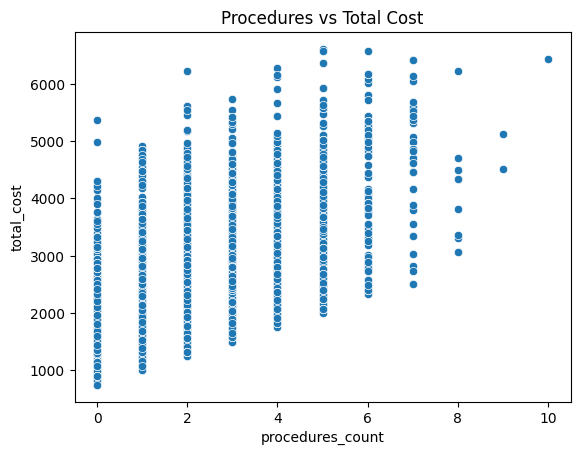

In [52]:
sns.scatterplot(x='procedures_count', y='total_cost', data=df)
plt.title("Procedures vs Total Cost")
plt.show()

In [54]:
df.groupby('discharge_status')['satisfaction_score'].mean()

discharge_status
recovered    2.931719
referred     2.128898
Name: satisfaction_score, dtype: float64

In [55]:
df.groupby('complications')['total_cost'].mean()

complications
0    2713.842795
1    3076.819127
Name: total_cost, dtype: float64

In [56]:
df.groupby('complications')['length_of_stay_days'].mean()

complications
0    3.448988
1    3.985447
Name: length_of_stay_days, dtype: float64

Age distribution

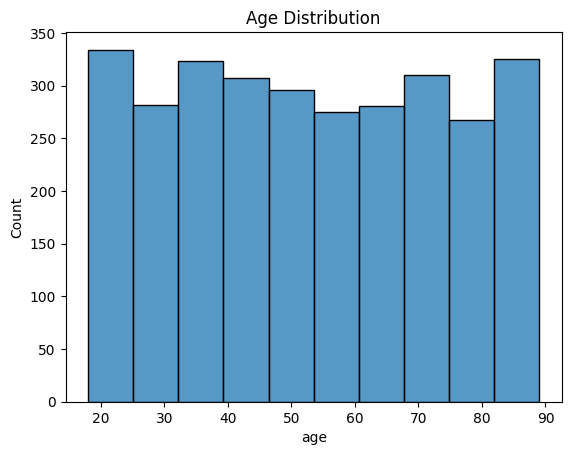

In [57]:
sns.histplot(df['age'], bins=10)
plt.title("Age Distribution")
plt.show()

Gender Count

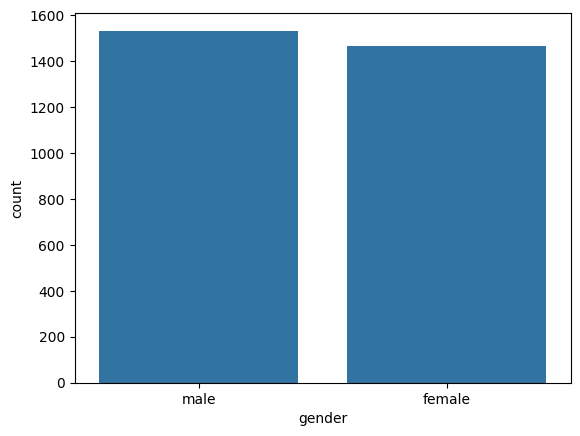

In [58]:
sns.countplot(x='gender', data=df)
plt.show()

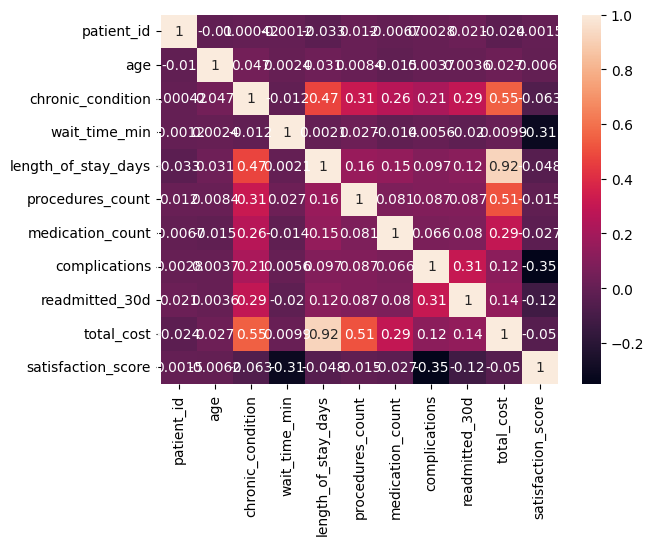

In [59]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

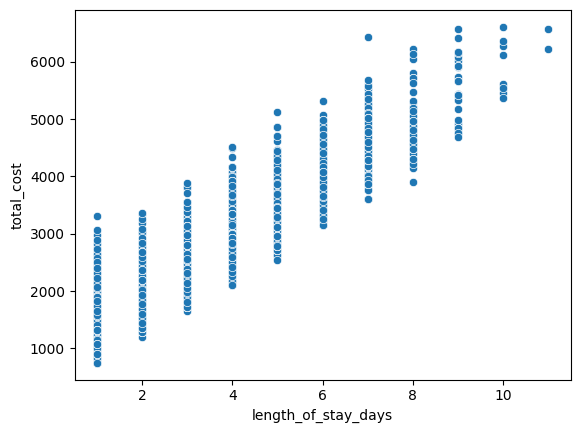

In [60]:
sns.scatterplot(x='length_of_stay_days', y='total_cost', data=df)
plt.show()

📊 Key Insight
Cost is strongly influenced by length of stay and procedures count. 
Patients with chronic conditions show higher readmission probability. 
Some departments have higher average wait time. 
Complications significantly increase hospital cost.
Satisfaction score drops when complications occur.